# Single Neural Network
 
###  <div align=center> Moon Il-chul(icmoon@kaist.ac.kr); Shin Dong-hyeok(tlsehdgur0@kaist.ac.kr) </div> 
 
본 코드는 MNIST 데이터셋을 이용한 Single Neural Network의 구현 예시입니다.  
본 코드를 통해서 Single Neural Network에서 initialization, forward pass, backpropagation 등을 학습할 수 있습니다.

## MNIST 데이터셋

MNIST 데이터셋은 0~9의 정수를 손으로 작성하여 28$\times$28 픽셀의 이미지로 구성된 거대한 데이터셋으로 머신러닝에서 성능을 측정해보는 벤치마크로서 널리 사용되고 있습니다.. MNIST 데이터셋은 약 60000개의 training set(mnist.train), 10000개의 test set(mnist.test)로 구성되어 있습니다. 또한 각각의 training set과 test set은 image와 label, 두 부분으로 나눌 수 있습니다. Image는 28$\times$28 픽셀을 28$\times$28=784차원 벡터로 저장되어있으며, label은 0~9까지 10개의 class이므로 10차원 벡터로 해당 이미지의 라벨을 저장합니다. MNIST 데이터셋은 http://yann.lecun.com/exdb/mnist/ 에서 직접 다운로드할 수도 있고, tesorflow를 이용한 코드를 통해 데이터를 다운받을 수 있습니다. 

## Single Neural Network

인공 뉴런(Artificial Neuron)은 생물학적인 뉴런의 역할과 구조를 인공적으로 만들어낸 하나의 Unit으로, Input 정보를 input activation function과 output activation function을 거치면서 정보를 전달하는 구조입니다. 인공 뉴런의 Input activation function과 output activation function은 아래와 같은 방식으로 진행됩니다.
* Neuron input activation function, linear sum
    $$a(X)=b+\sum_{i} w_ix_i$$
* Neuron output activation function, function g
    $$y=g(a(X))$$  
    
일반적으로 output activation function g로 sigmoid function을 사용하며, 이의 예시로는 logistic function, Hyperbolic tangent function, ReLU function 등이 있습니다.

인공신경망(Artificial Neural Network, ANN)은 여러 개의 인공 뉴런을 조합하여 네트워크형 구조를 갖는 것을 의미합니다. 인공신경망은 data를 입력하는 Input layer, 최종 결과물을 출력하는 Output layer 그리고 이 두 layer 사이에 존재하는 Hidden layer로 구성되어 있습니다. 이 중에서 Single Neural Network는 단일 Hidden layer를 갖는 인공신경망을 의미합니다.   
단일 Hidden layer를 갖는 Single Neural Network에서 정보의 전달은 아래와 같은 방식으로 진행됩니다. 
* Hidden layer input activation function, linear sum  
    $$a(X)=b_1+W_1X$$  
    이때, $W_1$는 Input layer dimension $\times$ hidden layer dimension 행렬
* Hidden layer output activation function, function g
    $$h(X)=g(a(X))$$  
    
* Output layer output activation function, function o
    $$f(X)=o(b_2+W_2h(X))$$  
    이때, $W_2$는 hidden layer dimension $\times$ output layer dimension 행렬
    
본 코드에서는 MNIST 데이터셋을 사용하므로 Input layer는 28$\times$28 픽셀을 변환한 784차원의 벡터, Hidden layer는 설정값 n차원 벡터, Output layer는 각 image의 label인 10차원 벡터로 구성되어 있습니다.

### Weight Initialization

인공신경망에서 weight는 학습의 주체이므로 이의 초기값 설정은 매우 중요한 이슈입니다. bias는 단어 그대로 초기값을 적절한 상수로 설정하여도 큰 문제가 없습니다. 그러나 모든 weight를 같은 값으로 설정하면 인공신경망이 symmetric해져서 randomness가 사라져 효과적인 학습을 방해할 수 있습니다. 더욱이 weight를 0으로 설정하면 Input X에 상관없이 곱셈으로 연결된 $W \times X$ term이 0이 되어서 무의미해집니다.     
이러한 문제를 해결하기 위해 weight를 적절한 distribution에서 임의로 sampling하는 방법을 사용합니다. 본 코드에서는 아래와 같은 방식으로 bias와 weight의 초기값을 설정하였습니다.  
    $$b_i, w_i ~ U[-\sqrt{\frac{6}{n_{i-1} + n_{i}}},\sqrt{\frac{6}{n_{i} + n_{i+1}}}]$$
    $$n_k : k번째 layer의 node 갯수$$
    
### Backpropagation 
본 코드는 MNIST 데이터셋을 이용한 Supervised learning이므로 적절한 loss function을 설정하여 loss를 감소하는 방향으로 parameter를 학습합니다. 먼저 loss function은 target value와 output value의 차이를 이용한 RSS 형태로 정의했습니다.  
$$E=\frac{1}{2}(\sum_{k} (t_k-o_k)^2)$$  
앞서 언급했듯이 인공신경망에서 학습해야하는 parameter는 weight이므로, 반복된 training을 통해 weight를 지속적으로 update 해야합니다. 우리는 weight를 update 하기 위해 널리 사용하는 경사하강법(gradient descent method)를 사용하였습니다. Single Depth Layer의 경우,
$$w_{jk}^{t+1} \leftarrow w_{jk}^t - \eta \frac{\partial E}{\partial w_{jk}}$$  
우리는 loss function이 $w_{jk}$에 영향을 받는다는 직관적 사실을 관찰할 수 있지만, 실제 gradient를 구할 수는 없기 때문에 chain rule을 통해 $\frac{\partial E}{\partial w_{jk}}$를 구할 수 있습니다. 이때, 본 코드에서는 logistic function을 output activation function $\sigma$으로 사용하였고, logistic function의 derivative는 다음 성질을 갖습니다.
$$\frac{d}{dx} f(x)=\frac{d}{dx}(1+e^{-x})^{-1}=e^{-x}(1+e^{-x})^{-2}=f(x)(1-f(x)) $$
위 성질과 chain rule을 이용하면 $\frac{\partial E}{\partial w_{jk}}$을 구할 수 있습니다.   
Let $ net_k = \sum_{j} w_{jk}o_j$, $o_k=\sigma (net_k)$  
$$\frac{\partial E}{\partial w_{jk}}=\frac{\partial E}{\partial o_k}\frac{\partial o_k}{\partial net_k}\frac{\partial net_k}{\partial w_{jk}}=-(t_k-o_k)o_k(1-o_k)o_j=-\delta_ko_j$$
$$w_{jk}^{t+1} \leftarrow w_{jk}^t - \eta \frac{\partial E}{\partial w_{jk}}=w_{jk}^t + \eta \delta_ko_j $$
$$\eta : learning rate, \delta_k=(t_k-o_k)o_k(1-o_k)$$

마찬가지의 방법으로 two depth layer에 해당하는 $w_{ij}$을 update할 수 있습니다.

$$\frac{\partial E}{\partial w_{ij}}= \sum_{k} \frac{\partial E}{\partial o_k}\frac{\partial o_k}{\partial net_k}\frac{\partial net_k}{\partial o_j}\frac{\partial o_j}{\partial net_j}\frac{\partial net_j}{\partial w_{ij}}=\sum_{k} -(t_k-o_k)o_k(1-o_k) \frac{\partial net_k}{\partial o_j}\frac{\partial o_j}{\partial net_j}\frac{\partial net_j}{\partial w_{ij}}=\sum_{k} \delta_k\times w_{jk} \times o_j(1-o_j)\times o_i=-o_j(1-o_j)\sum_{k} \delta_k w_{jk} \times o_i= -\delta_j o_i$$
$$w_{ij}^{t+1} \leftarrow w_{ij}^t - \eta \frac{\partial E}{\partial w_{ij}}=w_{ij}^t + \eta \delta_ko_j $$
$$\delta_j=o_j(1-o_j)\sum_{k} \delta_k w_{jk}$$

## Single Layer Neural Network with MNIST data

In [1]:
'''
@ copyright: AAI lab (http://aailab.kaist.ac.kr/xe2/page_GBex27)
@ author: Moon Il-chul: icmoon@kaist.ac.kr
@ annotated by Shin Dong-hyeok: tlsehdgur0@kaist.ac.kr
'''

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
# tensorflow로부터 mnist data를 불러옴

mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


## Model Setting

In [2]:
n = 100 # n : Hidden Layer에서 node의 갯수

# batch와 epoch size 결정
batch_size = 100 # batch size : 한 번 iteration을 실행할 때 사용하는 데이터의 갯수 
total_batch = int(mnist.train.num_examples / batch_size) # total batch : 전체 batch의 갯수
epoch_size = 80 # epoch size : 전체 iteration의 횟수 
total_costs = np.zeros(epoch_size) # total_costs : 각 epoch마다 total cost를 저장

# logistic function 정의
def Logis(x):
    y = 1/(1+np.exp(-x))
    return y

## Weight & Bias term initialization

In [3]:
# Initialization을 이용하여 weight와 biase의 초기값 부여
w1 = np.random.uniform(-np.sqrt(6.0/(784+n)),np.sqrt(6.0/(784+n)),(784,n))
b1 = np.random.uniform(-np.sqrt(6.0/(784+n)), np.sqrt(6.0/(784+n)),(1,n))

w2 = np.random.uniform(-np.sqrt(6.0/(n+10)),np.sqrt(6.0/(n+10)),(n,10))
b2 = np.random.uniform(-np.sqrt(6.0/(n+10)),np.sqrt(6.0/(n+10)),(1,10))


## BackPropagation 

Epoch :  0010 cost = 0.21880
Epoch :  0020 cost = 0.20090
Epoch :  0030 cost = 0.19048
Epoch :  0040 cost = 0.18459
Epoch :  0050 cost = 0.17957
Epoch :  0060 cost = 0.17663
Epoch :  0070 cost = 0.17345
Epoch :  0080 cost = 0.17168


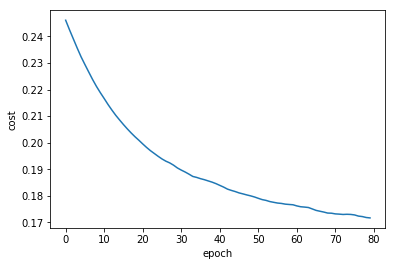

optimization complete


In [4]:
for epoch in range(epoch_size): # epoch_size만큼 반복실행
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
        X = batch_xs # batch size만큼의 training Input(=image 벡터) 
        Y = batch_ys # batch size만큼의 training supervision(=각 image의 label)
        
        '''forward-pass of neural network'''
        L1 = np.matmul(X,w1)+b1 # Hidden Layer의 input activation function, L1 = b1 + W1*X
        L1 = Logis(L1) # Hidden Layer의 output activation function with logistic function 

        L2 = np.matmul(L1,w2)+b2 # Output Layer의 input activation function, L2 = b2 + W2*L1
        Y_hat = np.exp(L2)/np.exp(L2).sum(axis=1).reshape(-1,1) # Output Layer의 output activation function with softmax function 

        '''backward-pass of neural network'''
        delt_1 = np.dot(np.dot(Y_hat,np.ones((10,batch_size))-Y_hat.T),Y-Y_hat) # delta signal1 = (Y-Y_hat)Y_hat(1-Y_hat)
        w2_gradient = (-np.dot(L1.T,delt_1))/batch_size # gradient of w2 = - delt_1*L1
        b2_gradient = (-np.average(delt_1, axis=0)) # gradient of b2

        delt_2 = np.dot(delt_1,w2.T)*L1*(1-L1) # delta signal2 = L1(1-L1)(delt_1*w2)
        # 앞서 Output Layer의 output activation function은 softmax function로 설정했지만,
        # binary case에서는 softmax와 logistic function이 동일한 형태를 가지므로 logistic function의 derivative 성질을 사용할 수 있습니다.
        w1_gradient = (-np.dot(X.T,delt_2))/batch_size # gradient of w1 = - delt_2*X
        b1_gradient = (-np.average(delt_2, axis=0)) # gradient of b1

        '''weight update'''
        learning_rate = 0.001
        w2 -= learning_rate*w2_gradient
        b2 -= learning_rate*b2_gradient
        w1 -= learning_rate*w1_gradient
        b1 -= learning_rate*b1_gradient

        total_cost += np.mean(0.5*np.square(Y-Y_hat)) # total cost = 1/2(sum of (Y-Y_hat)^2)
        
    total_cost = total_cost/batch_size
    total_costs[epoch] = total_cost
    if epoch % 10 == 9:
        print('Epoch : ', '%04d' % (epoch+1), 'cost =', '%.5f' % (total_cost))

plt.plot(total_costs)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()
print('optimization complete')

## 결과해석부1

위의 출력문과 그래프는 epoch 값과 각 epoch에서의 total cost를 나타낸 것입니다.  
Training을 진행할수록(Epoch가 증가할수록), total cost가 꾸준히 감소함을 확인할 수 있습니다.  
이는 경사하강법을 이용하여 Single Neural Network가 유의미하게 learning 되었음을 알 수 있습니다.

## Accuracy Test (Classifier)

In [5]:
'''classification accuracy test'''
X_test = mnist.test.images # Test set의 Input(=image 벡터)
Y_test = mnist.test.labels # Test set의 supervision(=각 image의 label)

L1_test = np.matmul(X_test,w1)+b1
L1_test = Logis(L1_test)
L2_test = np.matmul(L1_test,w2)+b2
Y_hat_test = np.exp(L2_test)/np.exp(L2_test).sum(axis=1).reshape(-1,1)

is_correct = np.equal(np.argmax(Y_hat_test,1),np.argmax(Y_test,1)) # Y_hat과 supervision의 일치하는 횟수를 count
accuracy = np.sum(is_correct.astype(int))*0.0001

print ('accuracy is :','%.5f' % (accuracy))

accuracy is : 0.84960


## 결과 해석부2

위는 해당 모델의 성능을 측정하기 위해 Test set을 이용하여 정확도를 측정한 결과입니다.  
동일 input에 대하여 단일 인공 신경망을 이용한 추정값 $\hat{y}$과 실제 label y의 일치 횟수를 count하여 정확도를 측정하였습니다.  
그 결과, 학습에 사용되었던 Training set뿐 아니라 새로운 데이터인 Test set에 대해서도 Single Neural Network가 잘 실행됨을 알 수 있습니다.